In [1]:
# This work is part of "Data Analysis with Python" online course by IBM powered by coursera
#   The processes included in this work constitute of:
# 1- Dataset Importing 
# 2-data Wrangling
# 3-Exploratory data analysis
# 4- Model development 
# 5- Model evaluation using visualization and in-sample measures (R^2, MSE) 

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
from scipy import stats 

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
# Importing dataset
df = pd.read_csv("cars.data", header=None)

In [9]:
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [10]:
#  Changing columns titles.
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [11]:
df.columns = headers
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [12]:
# Replace "?" with nan
df.replace("?", np.nan, inplace = True)

In [13]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [14]:
# Drop missing values from price. Because the target "we want to predict" in our dataset is price. 
df=df.dropna(subset=["price"], axis=0)
df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [15]:
# Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [16]:
# Type for each column in the dataset
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [17]:
# A statistical summary
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [18]:
#data wrangling 
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# Counting missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

symboling
False    201
Name: symboling, dtype: int64

normalized-losses
False    164
True      37
Name: normalized-losses, dtype: int64

make
False    201
Name: make, dtype: int64

fuel-type
False    201
Name: fuel-type, dtype: int64

aspiration
False    201
Name: aspiration, dtype: int64

num-of-doors
False    199
True       2
Name: num-of-doors, dtype: int64

body-style
False    201
Name: body-style, dtype: int64

drive-wheels
False    201
Name: drive-wheels, dtype: int64

engine-location
False    201
Name: engine-location, dtype: int64

wheel-base
False    201
Name: wheel-base, dtype: int64

length
False    201
Name: length, dtype: int64

width
False    201
Name: width, dtype: int64

height
False    201
Name: height, dtype: int64

curb-weight
False    201
Name: curb-weight, dtype: int64

engine-type
False    201
Name: engine-type, dtype: int64

num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64

engine-size
False    201
Name: engine-size, dtype: int64

fuel-system
Fa

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [21]:
# Replace nan values with the mean for 'normalized losses' column 
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [22]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [23]:
# Replace nan values with the mean for 'bore' column 
avg_bore = df["bore"].astype('float').mean(axis=0)
print("average bore", avg_bore)

average bore 3.3307106598984775


In [24]:
df["bore"].replace(np.nan, avg_bore, inplace= True)

In [25]:
# Replace nan values with the mean for 'stroke' column 
avg_stroke = df["stroke"].astype('float').mean(axis=0)
print("storke average", avg_stroke)

storke average 3.2569035532994857


In [26]:
df["stroke"].replace(np.nan, avg_stroke, inplace=True)

In [27]:
# Replace nan values with the mean for 'horsepower' column 
avg_horsepower = df["horsepower"].astype('float').mean(axis=0)
print("average horsepower", avg_horsepower)

average horsepower 103.39698492462311


In [28]:
df["horsepower"].replace(np.nan, avg_horsepower, inplace= True)

In [29]:
# Replace nan values with the mean for 'peak-rpm' column 
avg_peak_rpm = df["peak-rpm"].astype('float').mean(axis=0)
print("average peak rpm", avg_peak_rpm)

average peak rpm 5117.587939698493


In [30]:
df["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace= True)

In [31]:
# Replace the missing 'num-of-doors' values by the most frequent 
df['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [32]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [33]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [34]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [35]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [36]:
# Correct data type for each column
df[["bore"]]= df[["bore"]].astype('float')

In [37]:
df[["stroke"]]= df[["stroke"]].astype('float')

In [38]:
df[["price"]]=df[["price"]].astype('float')

In [39]:
df[["peak-rpm"]]=df[["peak-rpm"]].astype('float')

In [40]:
df[["normalized-losses"]]=df[["normalized-losses"]].astype('int')

In [41]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [42]:
# Data normalization 
df['length']=  df['length']/df['length'].max()

In [43]:
df['width']= df['width']/df['width'].max()

In [44]:
# binning to segment variable into categorial bins
df["horsepower"]=df["horsepower"].astype(int, copy=True)

In [45]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [46]:
group_names = ['Low', 'Medium', 'High']

In [47]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
10,101,Low


In [48]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

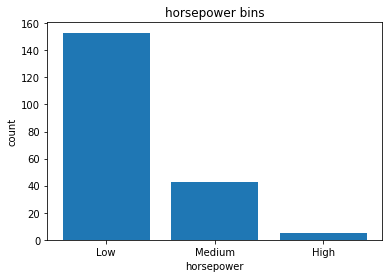

In [49]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [50]:
# Creating indicator variables for 'fuel type'
dummy_v1 = pd.get_dummies(df["fuel-type"])
dummy_v1

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [51]:
df = pd.concat([df, dummy_v1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [52]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,19,26,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,24,30,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,18,22,17450.0,Low,0,1


In [53]:
# Creating indicator variables for 'aspiration' 
dummy_v2 = pd.get_dummies(df["aspiration"])
dummy_v2

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
200,1,0
201,0,1
202,1,0
203,0,1


In [54]:
df = pd.concat([df, dummy_v2], axis = 1)
df.drop("aspiration", axis = 1, inplace= True)

In [55]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,19,26,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,24,30,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,18,22,17450.0,Low,0,1,1,0


In [56]:
# Correlation between variables
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,std,turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075776,0.279719,-0.035527,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,-0.225016,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371297,-0.360233,-0.470606,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579688,-0.286035,-0.665192,-0.698142,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.614972,-0.245852,-0.633531,-0.680635,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086901,-0.309913,-0.049800,-0.104812,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.758001,-0.279350,-0.749543,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822636,-0.256753,-0.650546,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566786,-0.267338,-0.582121,-0.591390,0.543154,0.054435,-0.054435,-0.227782,0.227782
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097598,-0.063720,-0.034079,-0.034741,0.082267,0.241033,-0.241033,-0.218190,0.218190


<AxesSubplot:xlabel='engine-size', ylabel='price'>

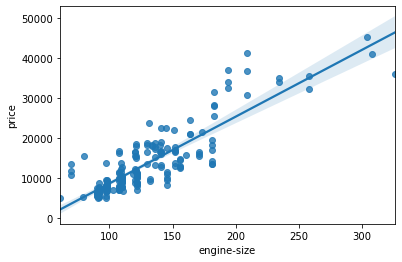

In [57]:
# Exploring potential predictor variables for 'price' via regplot
sns.regplot(x = "engine-size", y = "price", data = df)

<AxesSubplot:xlabel='horsepower', ylabel='price'>

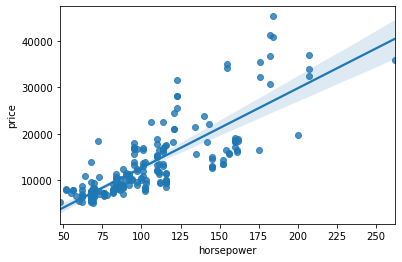

In [58]:
sns.regplot(x = "horsepower", y ="price", data =df)

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

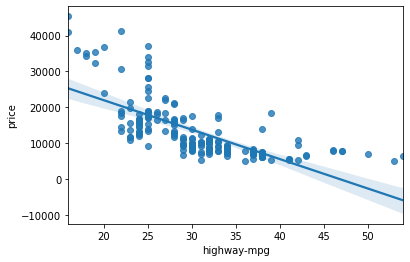

In [59]:
sns.regplot(x="highway-mpg", y = "price", data=df)

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

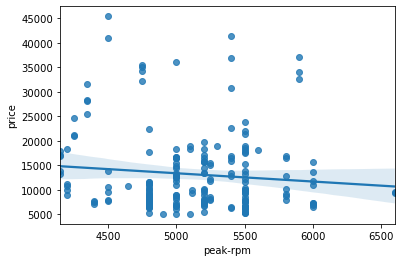

In [60]:
sns.regplot(x="peak-rpm", y="price", data=df)

<AxesSubplot:xlabel='body-style', ylabel='price'>

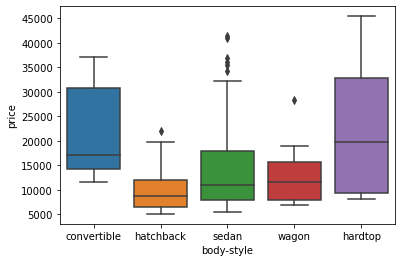

In [61]:
# Exploring potential categorical variables as predictor for 'price' via boxplot
sns.boxplot(x = "body-style", y = "price", data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

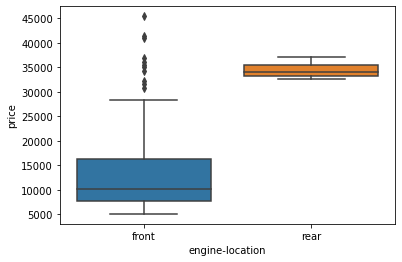

In [62]:
sns.boxplot(x= "engine-location", y= "price", data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

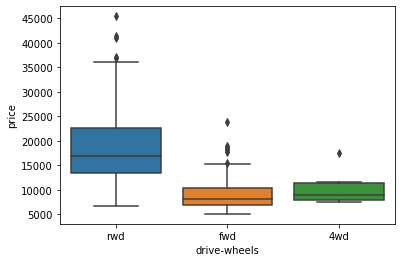

In [63]:
sns.boxplot(x="drive-wheels", y="price", data=df)

In [64]:
# Descriptive Statistical Analysis
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,std,turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.393035,5117.587940,25.179104,30.686567,13207.129353,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365623,478.113178,6.423220,6.815150,7947.066342,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
# Value counts
df["drive-wheels"].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [66]:
df["engine-location"].value_counts().to_frame()

,engine-location
front,198
rear,3


In [67]:
df["body-style"].value_counts().to_frame()

,body-style
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,6


In [68]:
df["make"].value_counts().to_frame()

,make
toyota,32
nissan,18
mazda,17
honda,13
mitsubishi,13
subaru,12
volkswagen,12
volvo,11
peugot,11
dodge,9


In [69]:
# Grouping
df_group1= df[["drive-wheels", 'body-style', 'price']]
df_group1

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
200,rwd,sedan,16845.0
201,rwd,sedan,19045.0
202,rwd,sedan,21485.0
203,rwd,sedan,22470.0


In [70]:
df_group1 = df_group1.groupby(['drive-wheels'], as_index=False).mean()

In [71]:
df_group1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [72]:
df_group2=df[["drive-wheels", "body-style","price"]]
df_group2

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
200,rwd,sedan,16845.0
201,rwd,sedan,19045.0
202,rwd,sedan,21485.0
203,rwd,sedan,22470.0


In [73]:
df_group2= df_group2.groupby(["drive-wheels", "body-style"], as_index=False).mean()
df_group2

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [74]:
# Pivot table
df_pivot = df_group2.pivot(index = "drive-wheels",columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [75]:
df_pivot = df_pivot.fillna(0)
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

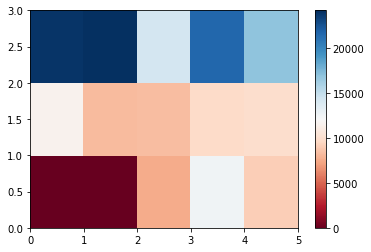

In [77]:
plt.pcolor(df_pivot,  cmap='RdBu')
plt.colorbar()
plt.show()

In [78]:
# Correlation between variables
pearson_coef, p_value = stats.pearsonr(df["wheel-base"], df["price"])
print(pearson_coef, p_value)

0.5846418222655081 8.076488270732989e-20


In [79]:
pearson_coef, p_value= stats.pearsonr(df['horsepower'], df["price"])
print(pearson_coef, p_value)

0.8097290352560285 5.924001027593172e-48


In [80]:
pearson_coef, p_value= stats.pearsonr(df["length"], df["price"])
print(pearson_coef, p_value)

0.6906283804483642 8.016477466158759e-30


In [81]:
pearson_coef, p_value= stats.pearsonr(df["width"], df["price"])
print(pearson_coef, p_value)

0.7512653440522673 9.200335510481646e-38


In [82]:
pearson_coef, p_value= stats.pearsonr(df["curb-weight"], df["price"])
print(pearson_coef, p_value)

0.8344145257702846 2.1895772388936914e-53


In [83]:
pearson_coef, p_value= stats.pearsonr(df["engine-size"], df["price"])
print(pearson_coef, p_value)

0.8723351674455185 9.265491622198389e-64


In [84]:
pearson_coef, p_value= stats.pearsonr(df["bore"], df["price"])
print(pearson_coef, p_value)

0.5431537659807733 8.051208825441245e-17


In [85]:
pearson_coef, p_value= stats.pearsonr(df["city-mpg"], df["price"])
print(pearson_coef, p_value)

-0.6865710067844677 2.321132065567674e-29


In [86]:
pearson_coef, p_value= stats.pearsonr(df["highway-mpg"], df["price"])
print(pearson_coef, p_value)

-0.7046922650589529 1.7495471144477352e-31


In [87]:
df_gptest = df[['drive-wheels','body-style','price']]
df_gptest


,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
200,rwd,sedan,16845.0
201,rwd,sedan,19045.0
202,rwd,sedan,21485.0
203,rwd,sedan,22470.0


In [88]:
group_test=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
group_test.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
140,4wd,7603.0


In [89]:
# ANOVA test: to see if different types of 'drive-wheels' impact 'price'!
f_val, p_val= stats.f_oneway(group_test.get_group('4wd')["price"], group_test.get_group('fwd')["price"],\
                            group_test.get_group('rwd')["price"])
print(f_val, p_val)

67.95406500780399 3.3945443577151245e-23


In [90]:
f_val1, p_val1 = stats.f_oneway(group_test.get_group('fwd')["price"],group_test.get_group('4wd')["price"])
print(f_val1, p_val1)

0.6654657502523033 0.41620116697845666


In [91]:
f_val2, p_val2= stats.f_oneway(group_test.get_group('fwd')['price'],group_test.get_group('rwd')["price"])
print(f_val2,p_val2)

130.5533160959111 2.2355306355677845e-23


In [92]:
f_val3,p_val3=stats.f_oneway(group_test.get_group('rwd')["price"], group_test.get_group('4wd')["price"])
print(f_val3, p_val3)

8.580681368924756 0.004411492211225333


In [93]:
#  Develop prediction models for car price

In [94]:
# Model no.1 "SLR" : using simple linear regression to predict car price from highway mpg
lr = LinearRegression()

In [95]:
x= df[["highway-mpg"]]
y = df[["price"]]

In [96]:
lr.fit(x,y)

LinearRegression()

In [97]:
yh= lr.predict(x)
yh[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [98]:
lr.intercept_

array([38423.30585816])

In [99]:
lr.coef_

array([[-821.73337832]])

In [100]:
# Model no. 2 (MLR): Multiple Linear Regression model using the following 
#  variables as the predictor variables.

In [101]:
z= df[["horsepower", "curb-weight","engine-size","highway-mpg"]]

In [102]:
y= df[["price"]]

In [103]:
lmr = LinearRegression()

In [104]:
lmr.fit(z,y)

LinearRegression()

In [105]:
yh3 = lmr.predict(z)
yh3[0:5]

array([[13698.95609311],
       [13698.95609311],
       [19056.78572196],
       [10621.59764327],
       [15519.32197778]])

In [106]:
lmr.coef_

array([[53.66247317,  4.70938694, 81.44600167, 36.55016267]])

In [107]:
lmr.intercept_

array([-15831.9309603])

In [108]:
#   Model Evaluation Using Visualization 

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

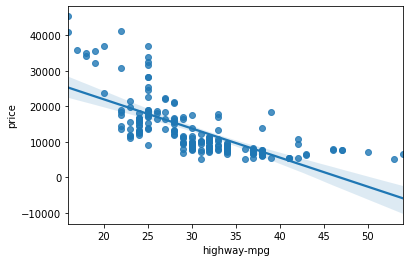

In [109]:
# Model no.1 -simple linear regression for highway - mpg-
sns.regplot(x= "highway-mpg", y = "price", data=df)

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

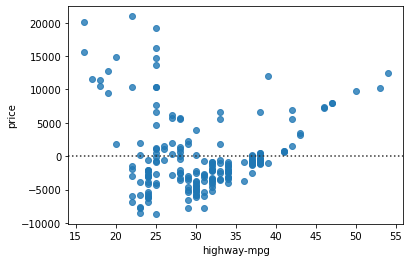

In [110]:
sns.residplot(x="highway-mpg", y = "price", data=df)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

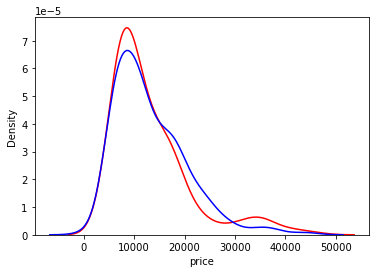

In [111]:
# Model no.2 Multiple linear regression via distribution plot
dis_fig= sns.distplot(df["price"], hist=False,color="r", label="Actual Values")
sns.distplot(yh3, hist=False, color="b", label= "fitted values", ax=dis_fig)

In [112]:
# Model no3 : Polynomial regression of 3rd order

In [113]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [114]:
x5 = df['highway-mpg']
y = df['price']

In [115]:
f= np.polyfit(x5,y,3)

In [116]:
p = np.poly1d(f)

In [117]:
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


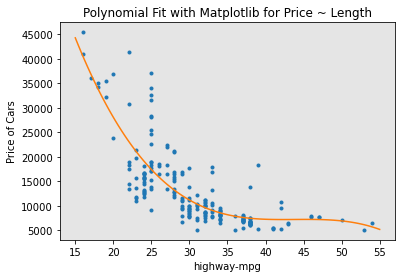

In [118]:
PlotPolly(p,x5,y,'highway-mpg')

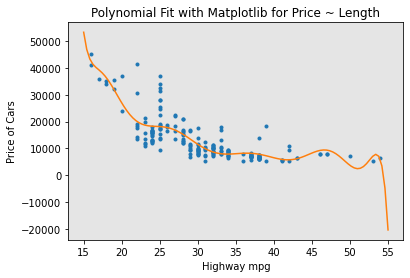

In [119]:
# Polynomial model of 11 order
f1= np.polyfit(x5,y,11)
p1= np.poly1d(f1)
PlotPolly(p1,x5,y,"Highway mpg")

In [120]:
# a polynomial transform on multiple features
from sklearn.preprocessing import PolynomialFeatures

In [121]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [122]:
z_pr=pr.fit_transform(z)

In [123]:
z.shape

(201, 4)

In [124]:
z_pr.shape

(201, 15)

In [125]:
# Creating a pipeline!
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [126]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]


In [127]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [128]:
z = z.astype(float)
pipe.fit(z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [129]:
ypipe=pipe.predict(z)
ypipe[0:5]

array([13103.67557905, 13103.67557905, 18229.84126783, 10394.17656982,
       16132.61710554])

In [130]:
# Measures for In-Sample Evaluation
# We used "R-squared" and "Mean Squared Error (MSE)" to compare between the 3 models we built:
# 1- Model no.1 simple linear regression using highway -mpg
# 2- Model no2 multiple linear regression using selected features
# 3- Model no3 polynomial regression 

In [131]:
# model no.1 
R_sq=lr.score(x,y)
mse= mean_squared_error(y,yh)
print("R squared", R_sq, "mean squared error", mse)


R squared 0.4965911884339175 mean squared error 31635042.944639895


In [132]:
# Model no.2 
R_sq2=lmr.score(z,y)
mse2= mean_squared_error(y,yh3)
print("R squared", R_sq2, "mean squared error", mse2)


R squared 0.80943904228153 mean squared error 11975165.993303549


In [133]:
# Model no.3
from sklearn.metrics import r2_score
R_sq3 = r2_score(y, p(x5))
mse3=mean_squared_error(y, p(x5))
print("R squared", R_sq3, "mean squared error", mse3)


R squared 0.674194666390652 mean squared error 20474146.426361218


In [134]:
# Comparing the three models  based  on R^2 and MSE 
# The best model is multi linear regression model no.2 

In [135]:
# Prediction using model no.1 with new input data  
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 


In [136]:
#new input data
new_data=np.arange(1, 100, 1).reshape(-1, 1)

In [137]:
lr.fit(x, y)
lr

LinearRegression()

In [138]:
yhat=lr.predict(new_data)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

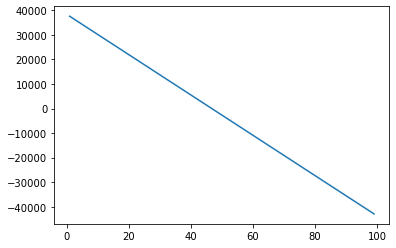

In [139]:
plt.plot(new_data, yhat)
plt.show()